In [64]:
import numpy as np 
import pandas as pd

In [65]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [50]:
#creating data artificially
x,y=make_classification(n_samples=1000,n_features=2,n_informative=2, n_redundant=0,
    n_repeated=0,n_classes=2,n_clusters_per_class=2,weights=[0.98,], class_sep=0.5,
    hypercube=True,shift=0.0,scale=1.0,flip_y=0,shuffle=True,random_state=0)

In [6]:
print(x.shape)
print(y.shape)

(1000, 2)
(1000,)


In [11]:
#example finding anomaly or outlier simply
usage=[120,124,192,132,112,121,117,500]
cutoff=pd.Series(usage).quantile(0.95)
print(cutoff)
print(pd.Series(usage)>cutoff)

392.1999999999998
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
dtype: bool


In [18]:
#first technique finding anomaly in dataset by quantile
vals=pd.Series(x[:,1])>pd.Series(x[:,0]).quantile(0.95)
print(vals[vals==True])
len(vals[vals==True])

15     True
17     True
19     True
40     True
43     True
66     True
83     True
85     True
114    True
129    True
139    True
164    True
215    True
243    True
281    True
292    True
303    True
326    True
345    True
449    True
511    True
530    True
551    True
583    True
584    True
588    True
605    True
630    True
631    True
662    True
695    True
702    True
728    True
729    True
734    True
752    True
755    True
765    True
772    True
773    True
813    True
815    True
818    True
838    True
859    True
862    True
881    True
884    True
947    True
984    True
dtype: bool


50

In [15]:
vals.value_counts()

False    950
True      50
dtype: int64

In [16]:
pd.crosstab(y,vals)
#50 points are anomaly predicted and only 7 is turn out as real anomaly and 43 as simple 
#13 are false negative
#In fraud detection false negative is okay but not flase positive

col_0,False,True
row_0,,
0,937,43
1,13,7


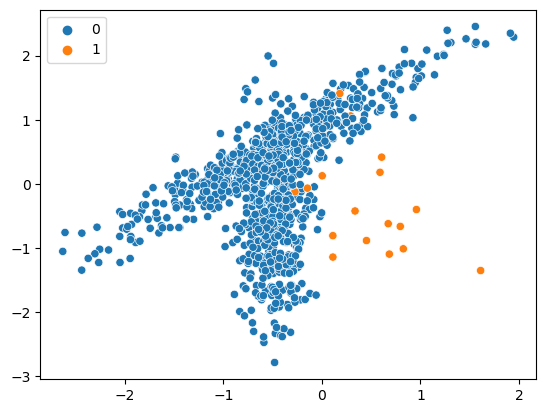

In [20]:
sns.scatterplot(x[:,0],x[:,1],hue=y)
plt.show()

In [66]:
#second method elliptic technique
from sklearn.covariance import EllipticEnvelope

In [67]:
ee=EllipticEnvelope(random_state=1)
ee.fit(x)
y_pred=ee.predict(x)==-1

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       980
           1       0.09      0.45      0.15        20

    accuracy                           0.90      1000
   macro avg       0.54      0.68      0.55      1000
weighted avg       0.97      0.90      0.93      1000



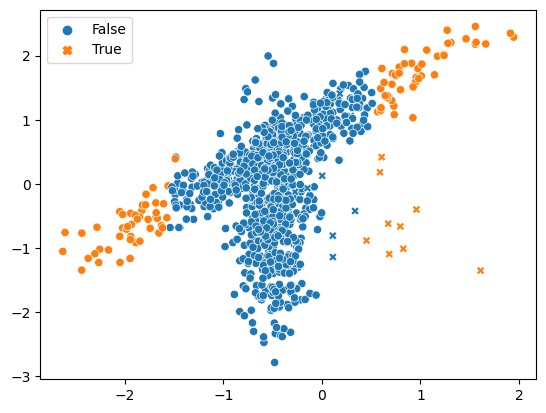

In [38]:
sns.scatterplot(x[:,0],x[:,1],hue=y_pred,style=y)
plt.show()

In [69]:
#third approch
from sklearn.neighbors import LocalOutlierFactor

In [70]:
lof=LocalOutlierFactor(n_neighbors=20)
y_pred=lof.fit_predict(x)==-1

In [71]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.34      0.65      0.45        20

    accuracy                           0.97      1000
   macro avg       0.67      0.81      0.72      1000
weighted avg       0.98      0.97      0.97      1000



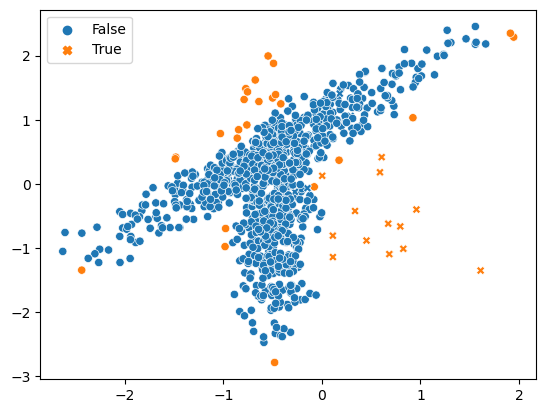

In [56]:
sns.scatterplot(x[:,0],x[:,1],hue=y_pred,style=y)
plt.show()

In [72]:
#fourth approch (isolation forest)
from sklearn.ensemble import IsolationForest


In [73]:
isf=IsolationForest(n_estimators=200,random_state=1)
y_pred=isf.fit_predict(x)==-1


In [74]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89       980
           1       0.07      0.65      0.12        20

    accuracy                           0.81      1000
   macro avg       0.53      0.73      0.50      1000
weighted avg       0.97      0.81      0.88      1000



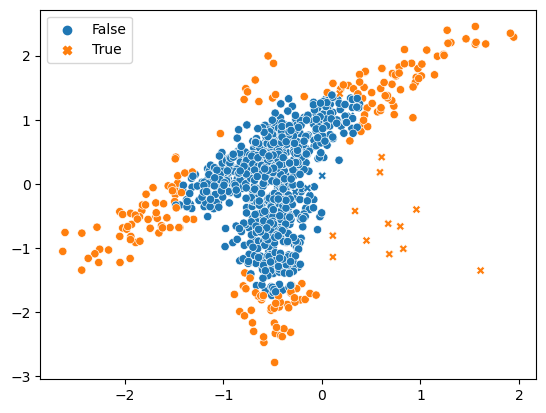

In [63]:
sns.scatterplot(x[:,0],x[:,1],hue=y_pred,style=y)
plt.show()

In [89]:
from sklearn.datasets import fetch_kddcup99

kddcup99=fetch_kddcup99(subset="http",random_state=1)

In [90]:

x=kddcup99["data"].astype(np.float64)
y=kddcup99["target"]

In [91]:
x.shape

(58725, 3)

In [92]:
y.shape

(58725,)

In [93]:
pd.Series(y).value_counts()

b'normal.'     56516
b'back.'        2203
b'phf.'            4
b'ipsweep.'        1
b'satan.'          1
dtype: int64

In [98]:
y=np.where(y==b'normal.',0,1)

In [99]:
y

array([0, 0, 0, ..., 0, 0, 0])

<AxesSubplot:>

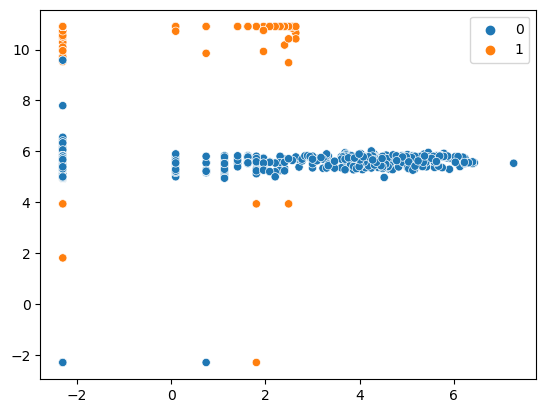

In [100]:
sns.scatterplot(x[:,0],x[:,1],hue=y)
#0th and 1st column in x

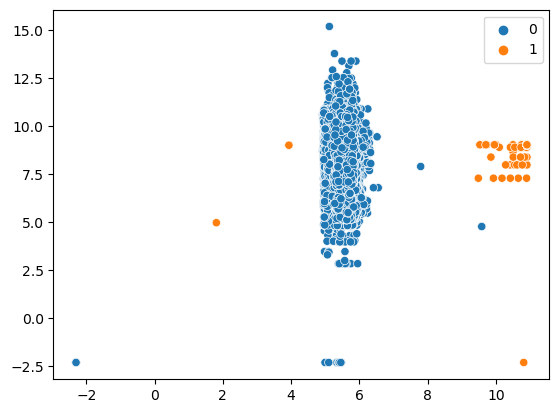

In [102]:
sns.scatterplot(x[:,1],x[:,2],hue=y)
plt.show()
#second and third columns. they can seperate data more clearly

In [112]:
#first approch percentile detector
vals=pd.Series(x[:,1])>pd.Series(x[:,1]).quantile(0.95)

<AxesSubplot:>

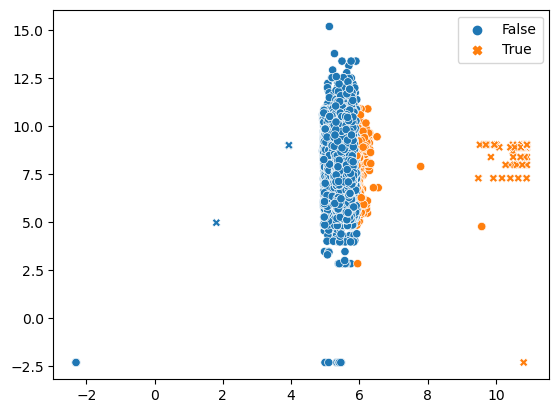

In [113]:
sns.scatterplot(x[:,1],x[:,2],hue=vals,style=y)

In [114]:
print(classification_report(y,vals))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56516
           1       0.76      1.00      0.86      2209

    accuracy                           0.99     58725
   macro avg       0.88      0.99      0.93     58725
weighted avg       0.99      0.99      0.99     58725



In [117]:
#second approch elliptic envolope
y_pred=ee.fit_predict(x)==-1

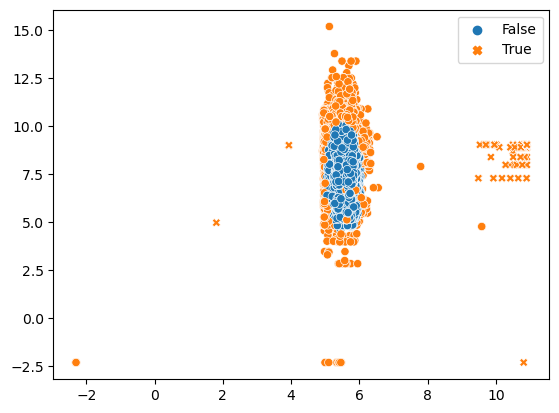

In [118]:
sns.scatterplot(x[:,1],x[:,2],hue=y_pred,style=y)
plt.show()

In [120]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56516
           1       0.38      1.00      0.55      2209

    accuracy                           0.94     58725
   macro avg       0.69      0.97      0.76     58725
weighted avg       0.98      0.94      0.95     58725



              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56516
           1       0.07      0.03      0.04      2209

    accuracy                           0.95     58725
   macro avg       0.51      0.51      0.51     58725
weighted avg       0.93      0.95      0.94     58725



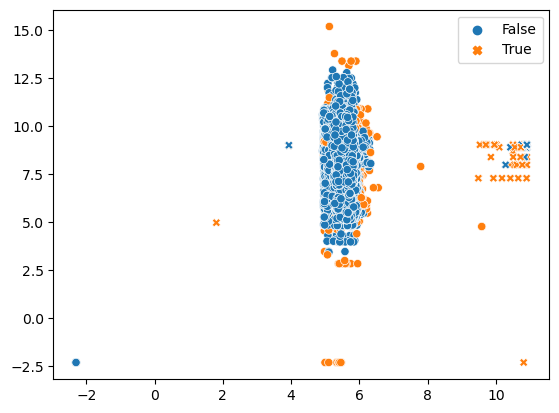

In [122]:
#third approch lof
y_pred=lof.fit_predict(x)==-1
print(classification_report(y,y_pred))
sns.scatterplot(x[:,1],x[:,2],hue=y_pred,style=y)
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56516
           1       0.30      1.00      0.46      2209

    accuracy                           0.91     58725
   macro avg       0.65      0.95      0.71     58725
weighted avg       0.97      0.91      0.93     58725



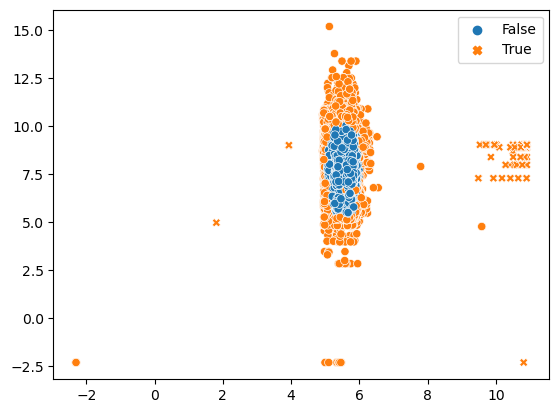

In [123]:
#fourth approch isf
y_pred=isf.fit_predict(x)==-1
print(classification_report(y,y_pred))
sns.scatterplot(x[:,1],x[:,2],hue=y_pred,style=y)
plt.show()